<a href="https://colab.research.google.com/github/bioai96/SKTFLYAI/blob/main/DL/%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1(%EC%A4%91%EC%9A%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


##데이터 불러오기

In [3]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [6]:
df = pd.read_csv('/content/data/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## 데이터 전처리하기

In [8]:
#결측치, 카테고리 변 수 처리하기
#결측치 알아보기 .isnull() , 모두 몇개인지 알아보기
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [9]:
#0과 1로 이루어진 변수로 바꾸어줌
df = pd.get_dummies(df)

In [10]:
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage         259
GarageYrBlt          81
MasVnrArea            8
Id                    0
BsmtExposure_Av       0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
BsmtExposure_No       0
BsmtExposure_Mn       0
BsmtExposure_Gd       0
BsmtCond_TA           0
BsmtFinType1_Rec      0
BsmtCond_Po           0
BsmtCond_Gd           0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
BsmtQual_Fa           0
BsmtFinType1_LwQ      0
dtype: int64

In [11]:
#남아있는 결측치를 평균값으로 채워줌
df = df.fillna(df.mean())
#특정값으로 대체 하려면 fillna(0)
#dropna()를 사용하면 결측치가 있는 속성 제거
#dropna(how='any')는 결측치가 하나라도 있으면 삭제하라는 의미이고
#dropna(how='all')는 모든 값이 결측치 일 때 삭제하라는 의미이고

In [12]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [13]:
df.isnull().sum().sort_values(ascending=False).head(20)

Id                  0
HeatingQC_Po        0
BsmtFinType1_BLQ    0
BsmtFinType1_ALQ    0
BsmtExposure_No     0
BsmtExposure_Mn     0
BsmtExposure_Gd     0
BsmtExposure_Av     0
BsmtCond_TA         0
BsmtCond_Po         0
BsmtCond_Gd         0
BsmtCond_Fa         0
BsmtQual_TA         0
BsmtQual_Gd         0
BsmtQual_Fa         0
BsmtQual_Ex         0
Foundation_Wood     0
BsmtFinType1_GLQ    0
BsmtFinType1_LwQ    0
BsmtFinType1_Rec    0
dtype: int64

In [15]:
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

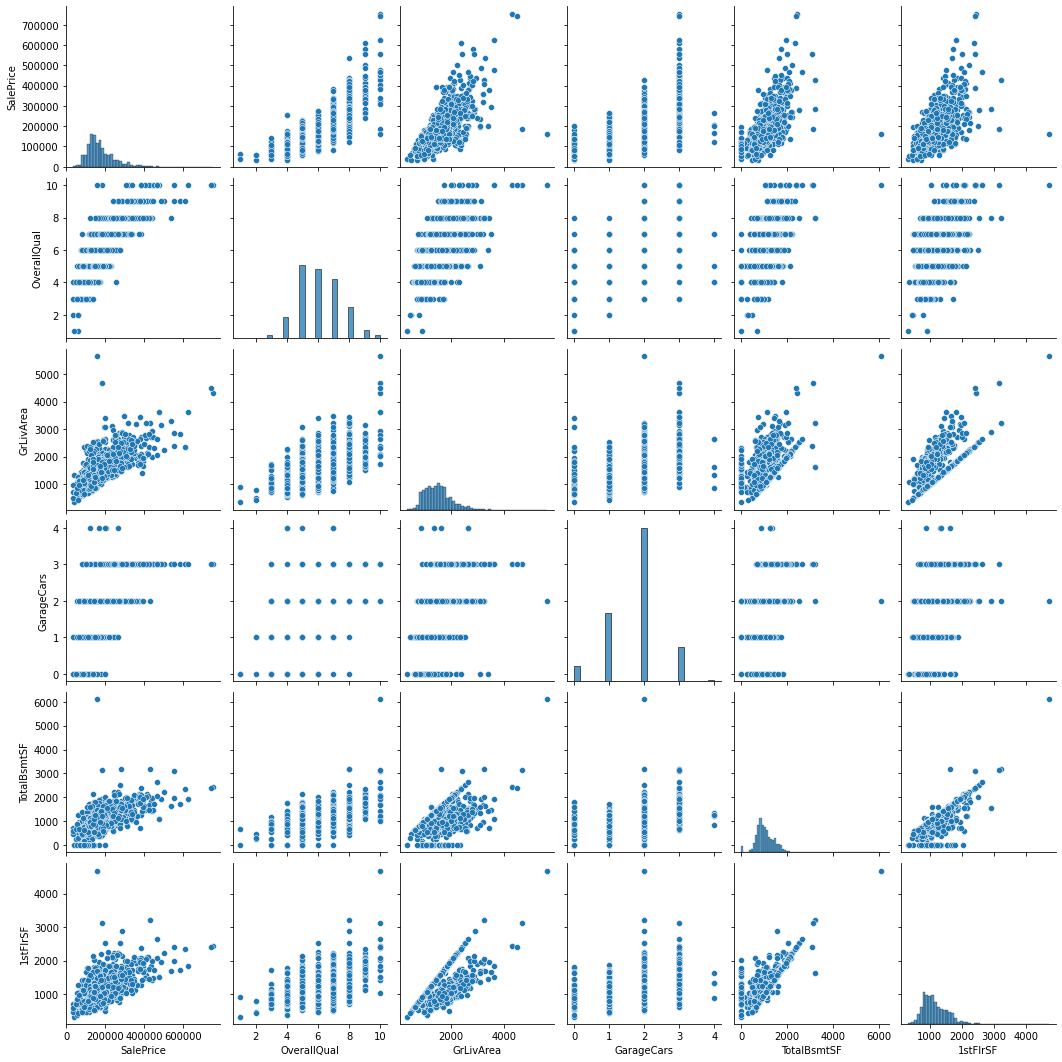

In [17]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF']
sns.pairplot(df[cols])
plt.show()

In [19]:
cols_train = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF']
x_train_pre = df[cols_train]
y = df['SalePrice'].values
x_train, x_test, y_train, y_test = train_test_split(x_train_pre,y, test_size = 0.2)


In [20]:
model = Sequential()
model.add(Dense(10,input_dim = x_train.shape[1], activation ='relu'))
model.add(Dense(30, activation ='relu'))
model.add(Dense(40, activation ='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# 20번 이상 결과과 향상되지 않으면 자동으로 중단
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

In [24]:
modelpath = './house.hdf5'

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=0, save_best_only=True)

In [28]:
history = model.fit(x_train,y_train,validation_split=0.25,epochs=2000,
                    batch_size=32,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
28/28 [==============================] - 4s 17ms/step - loss: 38914691072.0000 - val_loss: 40248500224.0000
Epoch 2/2000
28/28 [==============================] - 0s 7ms/step - loss: 38513537024.0000 - val_loss: 39655317504.0000
Epoch 3/2000
28/28 [==============================] - 0s 8ms/step - loss: 37673734144.0000 - val_loss: 38297010176.0000
Epoch 4/2000
28/28 [==============================] - 0s 9ms/step - loss: 35652550656.0000 - val_loss: 35135426560.0000
Epoch 5/2000
28/28 [==============================] - 0s 8ms/step - loss: 31279386624.0000 - val_loss: 28905234432.0000
Epoch 6/2000
28/28 [==============================] - 0s 9ms/step - loss: 23567060992.0000 - val_loss: 19050145792.0000
Epoch 7/2000
28/28 [==============================] - 0s 9ms/step - loss: 13351839744.0000 - val_loss: 8784791552.0000
Epoch 8/2000
28/28 [==============================] - 0s 9ms/step - loss: 4839996416.0000 - val_loss: 4532820992.0000
Epoch 9/2000
28/28 [======================

In [30]:
real_prices = []
pred_prices = []
x_num = []

n_iter = 0
y_prediction = model.predict(x_test).flatten()
for i in range(25):
  real = y_test[i]
  prediction = y_prediction[i]
  print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real,prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter+1
  x_num.append(n_iter)


실제가격: 145000.00, 예상가격: 166963.11
실제가격: 81000.00, 예상가격: 131119.14
실제가격: 195400.00, 예상가격: 172706.66
실제가격: 84500.00, 예상가격: 91012.63
실제가격: 145000.00, 예상가격: 179699.47
실제가격: 140000.00, 예상가격: 163644.41
실제가격: 187500.00, 예상가격: 186670.55
실제가격: 245000.00, 예상가격: 223430.59
실제가격: 170000.00, 예상가격: 166056.70
실제가격: 213000.00, 예상가격: 183532.61
실제가격: 125000.00, 예상가격: 155989.92
실제가격: 153337.00, 예상가격: 167110.59
실제가격: 122000.00, 예상가격: 200989.69
실제가격: 176000.00, 예상가격: 178216.39
실제가격: 129000.00, 예상가격: 155427.59
실제가격: 345000.00, 예상가격: 249595.44
실제가격: 239000.00, 예상가격: 257074.94
실제가격: 141000.00, 예상가격: 121426.23
실제가격: 110000.00, 예상가격: 242729.75
실제가격: 130000.00, 예상가격: 124299.98
실제가격: 221000.00, 예상가격: 213355.81
실제가격: 138887.00, 예상가격: 182329.62
실제가격: 242000.00, 예상가격: 281196.91
실제가격: 145500.00, 예상가격: 150295.02
실제가격: 127000.00, 예상가격: 190896.72


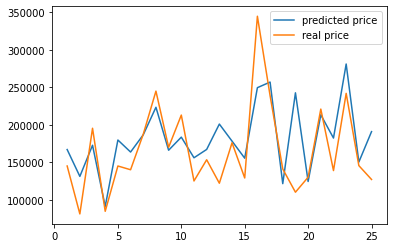

In [31]:
plt.plot(x_num, pred_prices, label='predicted price')
plt.plot(x_num, real_prices, label='real price')
plt.legend()
plt.show()